In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.pipeline import Pipeline
import random


In [2]:
data_train_multi = pd.read_csv('TrainingDataMulti.csv', header=None)
data_test_multi = pd.read_csv('TestingDataMulti.csv', header=None)
train_data_multi = data_train_multi.values
random.shuffle(train_data_multi)
X_train_multi = train_data_multi[:, 0:-1]
y_train_multi = train_data_multi[:, -1]
test_data_multi = data_test_multi.values
x_test_multi = test_data_multi
X_train_multi, X_valid_multi, y_train_multi, y_valid_multi = train_test_split(X_train_multi, y_train_multi, test_size=0.2, random_state=50)



In [3]:
rf_multi = RandomForestClassifier(random_state=42)
param_grid_rf_multi = {'n_estimators': [500, 1000, 1500], 'min_samples_leaf': [1, 2, 3]}
grid_search_multi = GridSearchCV(rf_multi, param_grid=param_grid_rf_multi, cv=5, n_jobs=-1)
grid_search_multi.fit(X_train_multi, y_train_multi)
print("Best parameters: {}".format(grid_search_multi.best_params_))


Best parameters: {'min_samples_leaf': 1, 'n_estimators': 500}


In [4]:
print("Validation set score: {:.2f}".format(grid_search_multi.score(X_valid_multi, y_valid_multi)))
predictions_multi = grid_search_multi.predict(X_valid_multi)
print ("Precision: {:.2f}".format(precision_score(y_valid_multi, predictions_multi, average='macro')))
print ("Recall: {:.2f}".format(recall_score(y_valid_multi, predictions_multi, average='macro')))
print ("F1-Score: {:.2f}".format(f1_score(y_valid_multi, predictions_multi, average='macro')))
print ("Accuracy: {:.2f}".format(accuracy_score(y_valid_multi, predictions_multi)))


Validation set score: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
Accuracy: 0.97


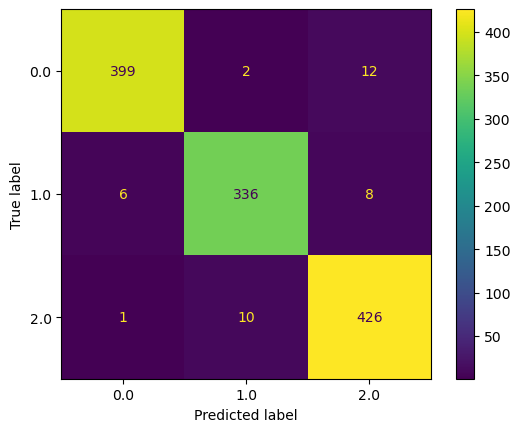

In [5]:
cm_multi = confusion_matrix(y_valid_multi, predictions_multi, labels=grid_search_multi.classes_)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=grid_search_multi.classes_)
disp_multi.plot()
plt.show()

In [6]:
test_predictions_multi = grid_search_multi.predict(x_test_multi)
test_predictions_multi

array([2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1.,
       1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
data_test_multi['128'] = test_predictions_multi